# Pergunta 03

## Aluno: José Rafael de Oliveira Neto

Execute o algoritmo das k-medias no Scikit-learn para particionar o espaço de dados em 2 grupos diferentes. Detalhe os parâmetros utilizados no processo. Deverá ser apresentado na documentação o Script desenvolvido para executar a clusterização, os clusteres gerados, e a atribuição de cada registro ao seu respectivo Cluster.

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from time import time
from sklearn.pipeline import make_pipeline


In [2]:
# Importando a base de dados

df = pd.read_csv('../input/atletas.csv', sep = ',')
print("\nDimensões:\n{0}\n".format(df.shape))
print("\nCampos:\n{0}\n".format(list(df.keys())))
print("\nTipos dos dados:\n")
format(df.info())
print(df.describe().to_string(max_cols=df.shape[1]), sep='\n')


Dimensões:
(9, 5)


Campos:
['Atleta', 'Força', 'Velocidade', 'Flexibilidade', 'Resistência']


Tipos dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Atleta         9 non-null      object
 1   Força          9 non-null      int64 
 2   Velocidade     9 non-null      int64 
 3   Flexibilidade  9 non-null      int64 
 4   Resistência    9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
          Força  Velocidade  Flexibilidade  Resistência
count  9.000000    9.000000       9.000000     9.000000
mean   6.000000    6.000000       7.111111     7.555556
std    2.061553    1.870829       2.147350     1.943651
min    2.000000    4.000000       4.000000     4.000000
25%    5.000000    4.000000       6.000000     6.000000
50%    6.000000    6.000000       7.000000     8.000000
75%    7.000000    7.000000       8.0

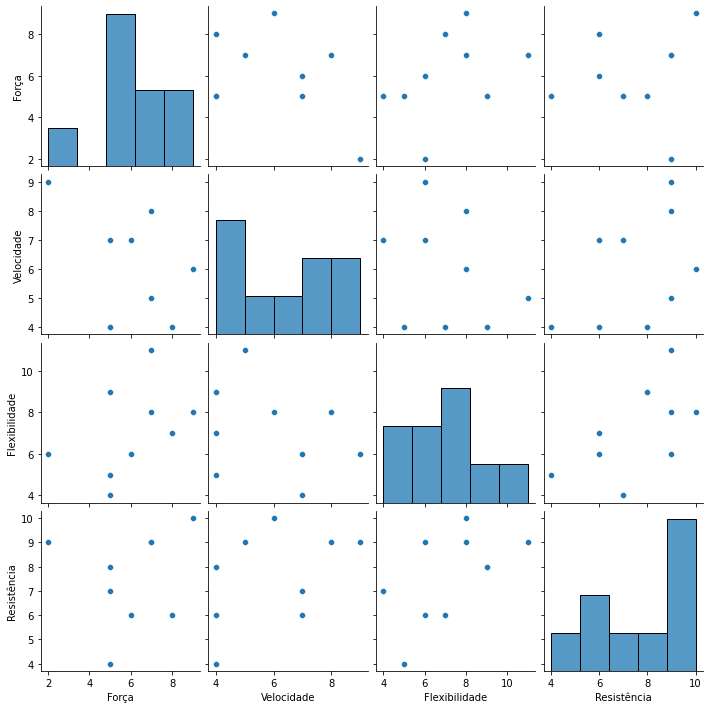

In [3]:
#Pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='variable', ylabel='value'>

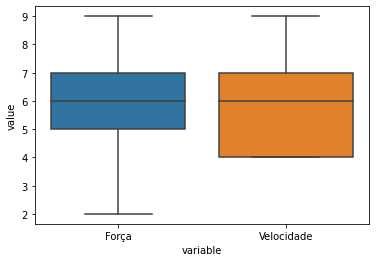

In [4]:
plot_atleta = df[['Força', 'Velocidade']]
sns.boxplot(data=pd.melt(plot_atleta), x='variable', y='value')

## Normalização da base

In [5]:
df.drop(df.columns[[0, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Força          9 non-null      int64
 1   Velocidade     9 non-null      int64
 2   Flexibilidade  9 non-null      int64
 3   Resistência    9 non-null      int64
dtypes: int64(4)
memory usage: 416.0 bytes


In [6]:
X = MinMaxScaler().fit_transform(df)
X = df.iloc[:,0:(df.shape[1] - 1)]
le = LabelEncoder()
y = le.fit_transform(df.iloc[:,(df.shape[1] - 1)])
class_names = le.classes_

### Aplicação do K-means

In [7]:
def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(df)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Mostra os resultados
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

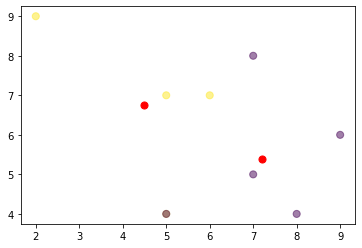

[[7.2  5.4  8.6  8.4 ]
 [4.5  6.75 5.25 6.5 ]]
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.016s	14	0.449	0.780	0.570	0.100	0.164	0.246
random   	0.012s	15	0.506	0.800	0.620	0.151	0.215	0.180
PCA-based	0.009s	16	0.414	0.655	0.507	-0.019	-0.017	0.127


In [8]:
kmeans = KMeans (n_clusters= 2).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['Força'], df['Velocidade'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

print(centroids)

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=df, labels=y)

kmeans = KMeans(init="random", n_clusters=3, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=df, labels=y)

pca = PCA(n_components=3).fit(df)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=df, labels=y)

In [9]:
X_scaled = StandardScaler().fit_transform(df)
n_samples = X.shape[0]
X_arr = np.array(df)

In [10]:
X = X_arr

estimator = KMeans(n_clusters=2, random_state=None)

model = estimator.fit(X)

y_pred = estimator.predict(X)

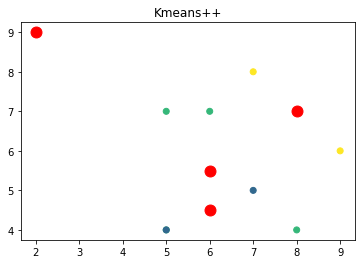

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	34	1.000	1.000	1.000	1.000	1.000	0.232
Centroids [[ 2.    9.    6.    9.  ]
 [ 6.    4.5  10.    8.5 ]
 [ 6.    5.5   5.5   5.75]
 [ 8.    7.    8.    9.5 ]]


In [11]:
estimator = KMeans(n_clusters=4, random_state=None, init='k-means++', max_iter=300)
y_pred = estimator.fit_predict(X)

centroids = estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=120, c='red', label = 'Centroids')

plt.title("Kmeans++")
plt.show()

labels = estimator.labels_

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)